# Activity: Structure your data 

## Introduction

In this activity, you will practice structuring, an **exploratory data analysis (EDA)** step that helps data science projects move forward. During EDA, when working with data that contains aspects of date and time, "datetime" transformations are integral to better understanding the data. As a data professional, you will encounter datatime transformations quite often as you determine how to format your data to suit the problems you want to solve or the questions you want to answer. This activity gives you an opportunity to apply these skills and prepare you for future EDA, where you will need to determine how best to structure your data.

In this activity, you are a member of an analytics team that provides insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars.  

You will work with a dataset about unicorn companies, discovering characteristics of the data, structuring the data in ways that will help you draw meaningful insights, and using visualizations to analyze the data. Ultimately, you will draw conclusions about what significant trends or patterns you find in the dataset. This will develop your skills in EDA and your knowledge of functions that allow you to structure data.





## Step 1: Imports 

### Import relevant libraries and modules

Import the relevant Python libraries and modules that you will need to use. In this activity, you will use `pandas`, `numpy`, `seaborn`, and `matplotlib.pyplot`.

In [1]:
# Import the relevant Python libraries and modules needed in this lab.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

### Load the dataset into a DataFrame

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration


### Display the first 10 rows of the data

In this section, you will discover what the dataset entails and answer questions to guide your exploration and analysis of the data. This is an important step in EDA. 

To begin, display the first 10 rows of the data to get an understanding of how the dataset is structured. 

In [3]:
# Display the first 10 rows of the data.
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows you want from the top of the DataFrame.

</details>

### Identify the number of rows and columns

Identify the number of rows and columns in the dataset. This will help you get a sense of how much data you are working with.

In [4]:
# Identify the number of rows and columns in the dataset.
companies.shape

(1074, 10)

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
len(companies['Company'].unique())

1073

In [7]:
double_counted = []
for i in companies['Company']:
    if companies['Company'].value_counts()[i] > 1:
        double_counted.append(i)
print(set(double_counted))

for j in list(set(double_counted)):
    print ('The company {} appear {} times'.format(j,double_counted.count(j)))

{'Bolt'}
The company Bolt appear 2 times


In [8]:
companies['Company'].value_counts()

Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: Company, Length: 1073, dtype: int64

In [9]:
companies.loc[companies['Company']=='Bolt']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,5/29/18,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,10/8/21,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the property that DataFrames in `pandas` have to display the number of rows and the number of columns as a tuple.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The `shape` property that DataFrames have can help.

</details>

**Question:** How many rows and columns are in the dataset? How many unicorn companies are there? How many aspects are shown for each company?


> The dataset contain 1074 rows (observations) and 10 columns (variables). The number of the companies included is 1073 as the company 'Bolt' appears twice. We have one aspect per company exept from the company 'Bolt' that as we mentioned it has been double entried.

### Check for duplicates in the data

In [10]:
# Check for duplicates.
companies.shape

(1074, 10)

In [11]:
companies.drop_duplicates().shape

(1074, 10)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in `pandas` that can be called on a DataFrame to return the same DataFrame but with duplicates removed.

Use property that DataFrames in `pandas` have that to display the number of rows and columns as a tuple.
 
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `drop_duplicates()` function on `companies`, followed by calling the `shape` property. 

Compare the shape that is returned from this to the original shape of `companies`, which you identified previously. 

</details>

**Question:** Based on the preceding output, are there any duplicates in the dataset?


>Based on our finding even though we have a company name that exists twice, it seems that we are looking two different companies that happen to share the same name as their rest information, exept from the 'Valuation' and 'Funding', is different. Therefore we do not have duplicates in our dataset.

### Display the data types of the columns 

Knowing the data types of the columns is helpful because it indicates what types of analysis and aggregation can be done, how a column can be transformed to suit specific tasks, and so on. Display the data types of the columns. 

In [12]:
# Display the data types of the columns.
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [13]:
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [14]:
companies.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,6/29/17,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/17,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/21,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/21,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,9/16/20,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the property that DataFrames in `pandas` have to display the data types of the columns in the specified DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The `dtypes` property that DataFrames have can help.

</details>

**Question:** What do you notice about the data types of the columns in the dataset?


>Our dataset is consist of variables with data types int and object. We can see that certain columns that represent numeric values are set up as objects creating difficulties in their manipulation. In addition, we can also see that the 'Date Joined' column is not a datetime type that could help us extract crusial time information and manipulate our data. Given that, we need to proceed by converting the variables into the correct for their manipulation, dtype.

**Question:** How would you sort this dataset in order to get insights about when the companies were founded? Then, how would you arrange the data from companies that were founded the earliest to companies that were founded the latest?


>I can sort my data based on the Year Founded column using the .sort_values('Year Founded') method to bring a table with the years ascending ( older year to most recent year ). If I wanted to see the companies that were founded the latest, I could add the method .tail() to see the bottom of my table or to use the argument ascending=False in the .sort_values() method.

### Sort the data

In this section, you will continue your exploratory data analysis by structuring the data. This is an important step in EDA, as it allows you to glean valuable and interesting insights about the data afterwards.

To begin, sort the data so that you can get insights about when the companies were founded. Consider whether it would make sense to sort in ascending or descending order based on what you would like to find.

In [15]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
companies.sort_values('Year Founded').head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
189,Otto Bock HealthCare,$4B,6/24/17,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners
373,Promasidor Holdings,$2B,11/8/16,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto"
699,Five Star Business Finance,$1B,3/26/21,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management..."
840,Radius Payment Solutions,$1B,11/27/17,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity
11,Epic Games,$32B,10/26/18,Other,Cary,United States,North America,1991,$7B,"Tencent Holdings, KKR, Smash Ventures"


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in `pandas` that allows you to sort a DataFrame along a specific column.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `sort_values()` function, specifying the `by` parameter as the name of the column that you want to sort by and the `ascending` parameter as needed. Note that by default, `ascending` is set to `True`. If you want to sort in descending order, specify the `ascending` parameter as `False`.

</details>

**Question:** What do you observe from the sorting that you performed?


>Printing the data sorting ascending=True we can see the companies that were founded the erliest. We observe that the year 1019 is the erliest year that a company were founded in our dataset.

**Question:** Which library would you use to get the count of each distinct value in the `Year Founded` column? 


>The library that I need for the cause of printing the count of each destinct value is the Pandas library with    
the   companies['Year Founded'].value_counts() method.

### Determine the number of companies founded each year

Find out how many companies in this dataset were founded each year. Make sure to display each unique `Year Founded` that occurs in the dataset, and for each year, a number that represents how many companies were founded then.

In [16]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.
companies['Year Founded'].value_counts()

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2021     11
2000     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1996      1
1919      1
1991      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: Year Founded, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in `pandas` that allows you to get the count for each distinct value in a specific column.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `value_counts()` function on the `Year Founded` column. 

</details>

**Question:** What do you observe from the counts of the unique `Year Founded` values in the dataset?


>I can see from my results that the year 2015 had been founded 155 companies in total which is the highest number among the rest of the years. In addition, we can say that the years 2014, 2015, 2016 were a very productive triplet as we see an escalating amount of founded companies in comparison with other years.

**Question:** What kind of graph represents the counts of samples based on a particular feature?


> For the purpose of showing the counts of a variable based on a particular feature, we can create a Histogram graph.

Plot a histogram of the `Year Founded` feature.

In [17]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [18]:
companies_year_founded = companies.sort_values('Year Founded')

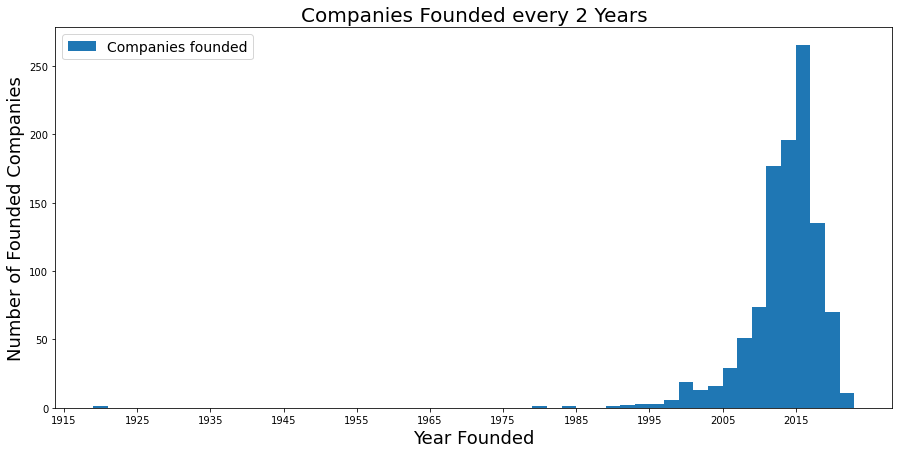

In [19]:
# Plot a histogram of the Year Founded feature.

# Using Pyplot
plt.figure(figsize=(15,7))
plt.hist(companies_year_founded['Year Founded'],bins=range(1919,2025,2),label='Companies founded')
plt.title('Companies Founded every 2 Years',fontsize=20)
plt.xlabel('Year Founded',fontsize=18)
plt.xticks(range(1915,2025,10))
plt.ylabel('Number of Founded Companies',fontsize=18)
plt.legend(fontsize=14)
plt.show()


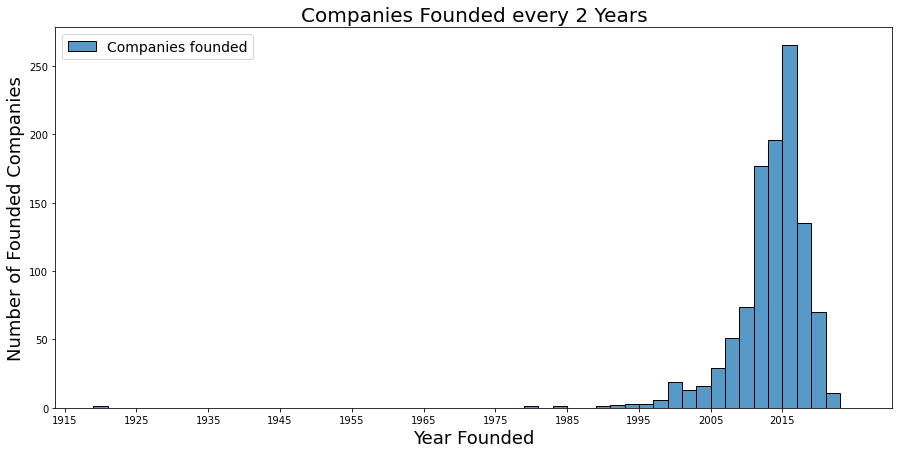

In [20]:
# Using Seaborn
plt.figure(figsize=(15,7))
sns.histplot(companies_year_founded['Year Founded'],binrange=(1919,2025),binwidth=2,label='Companies founded')
plt.title('Companies Founded every 2 Years',fontsize=20)
plt.xlabel('Year Founded',fontsize=18)
plt.xticks(range(1915,2025,10))
plt.ylabel('Number of Founded Companies',fontsize=18)
plt.legend(fontsize=14)
plt.show()

**Question:** If you want to compare when one company joined unicorn status to when another company joined, how would you transform the `Date Joined` column to gain that insight? To answer this question, notice the data types.


> The Date Joined variable represents dates. To utilize the information of this column, I have to convert its data type into a datetime data type using the pd.to_datetime() method.

### Convert the `Date Joined` column to datetime

Convert the `Date Joined` column to datetime. This will split each value into year, month, and date components, allowing you to later gain insights about when a company gained unicorn status with respect to each component.

In [21]:
# Convert the `Date Joined` column to datetime.
# Update the column with the converted values.
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

# Display the data types of the columns in `companies`
# to confirm that the update actually took place.
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about datetime transformations in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/supplement/ZcM4z/reference-guide-datetime-manipulation).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in `pandas` that allows you to convert an object to datetime format.

Use the property that DataFrames have that can be used to display the data types of the columns.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `to_datetime()` function on the `Date Joined` column.

Make sure to update the column by reassigning to the result of the function call mentioned previously.

Use the `dtypes` property to get the data types of the columns in `companies`.

</details>

**Question:** How would you obtain the names of the months when companies gained unicorn status?


> I can extract information from the datetime data types for all the time components. To specifically extract the months I can use the .dt.month attribute.

### Create a `Month Joined` column

Obtain the names of the months when companies gained unicorn status, and use the result to create a `Month Joined` column. 

In [22]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.

### YOUR CODE HERE ###

companies['Month Joined'] = companies['Date Joined'].dt.month_name().str[:3]

# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Apr
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Dec
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Jul
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",Jan
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Dec


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about extracting components from datetime objects in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Vh13u/use-structuring-methods-to-establish-order-in-your-dataset).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `pandas` library that contains datetime strings in order to extract the month names.

Use the function in the `pandas` library that allows you to display the first few rows of a DataFrame.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `dt.month_name()` function on the `Date Joined` column.

Use a pair of square brackets to create a new column. Make sure to specify the name of the new column inside the brackets and assign the column to the result of calling the function mentioned previously.

Use the `head()` function to display the first few rows of a DataFrame.

</details>

**Question:** Using the 'Date Joined' column, how would you determine how many years it took for companies to reach unicorn status?


> To find out the years that a company had to pass to reach the unicorn status we can subtract the Year Founded from the Date Joined.

### Create a `Years To Join` column

Determine how many years it took for companies to reach unicorn status, and use the result to create a `Years To Join` column. Adding this to the dataset can help you answer questions you may have about this aspect of the companies.

In [23]:
# Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.
companies['Year Joined'] = companies['Date Joined'].dt.year
companies['Years_to_Join'] = companies['Year Joined'] - companies['Year Founded']

# Display the first few rows of `companies`
# to confirm that the new column did get added.
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years_to_Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Apr,2017,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Dec,2012,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Jul,2018,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",Jan,2014,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Dec,2011,6


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about extracting components from datetime objects in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Vh13u/use-structuring-methods-to-establish-order-in-your-dataset).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the property in the `pandas` library that contains datetime strings in order to extract the year components.

Use the function in the `pandas` library that allows you to display the first few rows of a DataFrame.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `dt.year` property on the `Date Joined` column to obtain the years that companies became unicorns.

Obtain the arithmetic difference elementwise between two series in `pandas` by using the subtraction operator.  

Use a pair of square brackets to create a new column. Make sure to specify the name of the new column inside the brackets and assign the column to the result of calling the function mentioned previously.

Use the `head()` function can to display the first few rows of a DataFrame.

</details>

**Question:** Which year would you like to gain more insight on with respect when companies attained unicorn status, and why?


In [24]:
companies.groupby('Year Joined').agg({'Years_to_Join':['mean','median']}).round(2).sort_values(('Years_to_Join','mean'))

Years_to_Join       
                     mean median
Year Joined                     
2015                 5.51    4.0
2007                 6.00    6.0
2014                 6.00    4.0
2018                 6.18    5.0
2021                 6.80    6.0
2019                 7.04    6.0
2022                 7.44    7.0
2020                 7.57    6.0
2013                 7.67    8.0
2012                 8.25   10.0
2017                 8.84    5.0
2016                 9.00    7.0
2011                11.50   11.5

> I would like to focus my analysis on the year that seems to have the least mean and median duration of years that a company made to become unicorn.

### Gain more insight on a specific year

To gain more insight on the year of that interests you, filter the dataset by that year and save the resulting subset into a new variable. 

In [25]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable. 

year_2015 = companies.loc[companies['Year Joined'] == 2015]

# Display the first few rows of the subset to confirm that it was created.

year_2015.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years_to_Join
55,Gusto,$10B,2015-12-18,Fintech,San Francisco,United States,North America,2011,$691M,"General Catalyst Partners, Google Ventures, Kl...",Dec,2015,4
70,Tanium,$9B,2015-03-31,Cybersecurity,Kirkland,United States,North America,2007,$775M,"Andreessen Horowitz, Nor-Cal Invest, TPG Growth",Mar,2015,8
72,DJI Innovations,$8B,2015-01-23,Hardware,Shenzhen,China,Asia,2006,$105M,"Accel Partners, Sequoia Capital",Jan,2015,9
104,WeDoctor,$6B,2015-09-22,Health,Hangzhou,China,Asia,2010,$1B,"Tencent, Morningside Group",Sep,2015,5
133,Royole Corporation,$5B,2015-08-18,Hardware,Shenzhen,China,Asia,2012,$492M,"Warmsun Holding, IDG Capital Partners",Aug,2015,3


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about structuring data in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Vh13u/use-structuring-methods-to-establish-order-in-your-dataset).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the property in the `pandas` library that contains datetime strings in order to extract the year components.

Use square brackets to filter a DataFrame in order get a subset of the data. Make sure to specify an appropriate condition inside those brackets. The condition should convey which year you want to filter by. The rows that meet the condition are the rows that will be selected.

Use the function in the `pandas` library that allows you to display the first few rows of a DataFrame.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `dt.year` property on the `Date Joined` column to obtain the years that companies became unicorns.

Make sure to create a new variable and assign it to the subset. 

Use the `head()` function to display the first few rows of a DataFrame.

</details>

**Question:** Using a time interval, how could you observe trends in the companies that became unicorns in one year?


> From the year of my interest, which in this case is the year 2015, I can review my data's behaivor in the by week time interval. By creating a new column that contains the week that each company Joined the unicorn's club, we can group by that column and aggrecate our variables to observe the offered trends.

In [26]:
# Let's tidy up our table bringing the columns we use up front.
year_2015 = year_2015[['Company','Industry','Valuation','Funding','Year Founded','Date Joined','Year Joined','Month Joined',
                       'Years_to_Join','City','Country/Region','Continent','Select Investors']]
year_2015.head(1)

,Company,Industry,Valuation,Funding,Year Founded,Date Joined,Year Joined,Month Joined,Years_to_Join,City,Country/Region,Continent,Select Investors
55,Gusto,Fintech,$10B,$691M,2011,2015-12-18,2015,Dec,4,San Francisco,United States,North America,"General Catalyst Partners, Google Ventures, Kl..."


### Observe trends over time

Implement the structuring approach that you have identified to observe trends over time in the companies that became unicorns for the year that interests you.

In [27]:
# After identifying the time interval that interests you, proceed with the following:
# Step 1. Take the subset that you defined for the year of interest. 
#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of that year.
#         Save the resulting DataFrame in a new variable.

year_2015.insert(8,'Week Joined',year_2015['Date Joined'].dt.strftime('%Y-W%V'),True)

year_15_week = year_2015.groupby('Week Joined').count()['Company'].reset_index(name='Company count')

# Display the first few rows of the new DataFrame to confirm that it was created

year_15_week.head()


,Week Joined,Company count
0,2015-W01,1
1,2015-W02,1
2,2015-W03,1
3,2015-W04,2
4,2015-W10,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about structuring data in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Vh13u/use-structuring-methods-to-establish-order-in-your-dataset).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To obtain the data in a specific periodic datetime format, call a function in the `pandas` library on a series that contains datetime strings.   

Keep in mind that currently, the `Valuation` column is of data type `object` and contains `$` and `B` to indicate that each amount is in billions of dollars.

Call functions in the `pandas` library to achieve the following tasks:
  - Apply a function to each value in the series.
  - Cast each value in the series to a specified data type.

Use a pair of square brackets to access a particular column from the result of grouping a DataFrame. 

Use these functions in the `pandas` library to achieve the following tasks:
- Concatenate two DataFrames together
- Drop columns that you do not need from a DataFrame
- Group a DataFrame by a specific column
- Compute the average value for each group
- Reset the index so that the column that you grouped on also appears as a column after the grouping (instead of remaining an index) 
- Rename columns in a DataFrame
- Display the first few rows of a DataFrame

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `dt.strftime('%Y-W%V')` on the `Date Joined` column to obtain the weeks that companies became unicorns.

Use these functions in `pandas` to acheive the following tasks:
- `groupby()` to group a DataFrame by a specific column
- `count()` to count the number of rows that belong to each group
- `reset_index()` to reset the index so that the column that you grouped on also appears as a column after the grouping (instead of remaining an index) 
- `rename()` to rename the columns in a DataFrame
- `head()` to display the first few rows of a DataFrame

</details>

**Question:** How would you structure the data to observe trends in the average valuation of companies from 2020 to 2021?  

> First I would have to create a new column with the amount of the valuation by filtering out the text sympols and setting the data type of the new column into int. Having this information into a number type I can manipulate my dataset accordingly to spot new trends. To limit my observation in the years 2020 & 2021 I could asign my filtered dataset into a new one that will contain only those two years. To observe trends I need to specify a time interval that I want to examin. If for instance, I want to review the data of the average evaluation of the joined companies by quarter, then I'll have to extract the quarter information form the datetime column and group by it aggregating the valuation amount by mean.

### Compare trends over time

Implement the structuring approach that you have identified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. Keep in mind the data type of the `Valuation` column and what the values in that column contain currently.

In [28]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that you defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.

df14_16 = companies.loc[(companies['Year Joined'] == 2014) | (companies['Year Joined'] == 2016)]
df14_16 = df14_16[['Company','Industry','Valuation','Funding','Year Founded','Date Joined','Year Joined','Month Joined',
                       'Years_to_Join','City','Country/Region','Continent','Select Investors']]
df_concat = pd.concat([year_2015.drop('Week Joined',axis=1),df14_16])
df_concat.insert(7, 'Quarter Joined', df_concat['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q'),True)
df_concat['Valuation'] = df_concat['Valuation'].str[1:-1].astype(float)
df_concat = df_concat.groupby(['Year Joined','Quarter Joined']).mean()['Valuation'].reset_index(name = 'Average Valuation').round(2)
df_concat = df_concat.sort_values('Year Joined')

# Display the first few rows of the new DataFrame to confirm that it was created.

df_concat[['Quarter Joined','Average Valuation']]

,Quarter Joined,Average Valuation
0,2014-Q1,48.00
1,2014-Q2,2.50
2,2014-Q3,3.33
3,2014-Q4,9.17
4,2015-Q1,3.00
5,2015-Q2,1.83
6,2015-Q3,2.15
7,2015-Q4,2.62
8,2016-Q1,8.25
9,2016-Q2,2.78



<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about manipulating data in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/0GjvK/date-string-manipulations-with-python).

</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To obtain the data in a specific periodic datetime format, call a function in the `pandas` library on a series that contains datetime strings.   

Keep in mind that currently, the `Valuation` column is of data type `object` and contains `$` and `B` to indicate that each amount is in billions of dollars.

Call functions in the `pandas` library on a series to acheive the following tasks:
  - Apply a function to each value in the series.
  - Cast each value in the series to a specified data type.

Use a pair of square brackets to access a particular column from the result of grouping a DataFrame. 

These functions in the `pandas` library can help achieve the following tasks:
- Concatenate two DataFrames together
- Drop columns that you do not need from a DataFrame
- Group a DataFrame by a specific column
- Compute the average value for each group
- Reset the index so that the column that you grouped on also appears as a column after the grouping (instead of remaining an index) 
- Rename columns in a DataFrame
- Display the first few rows of a DataFrame

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `.dt.to_period('Q').dt.strftime('%Y-Q%q')` on the `Date Joined` column to obtain the quarters during which companies became unicorns.

Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.

Use the following functions in `pandas` to acheive the following tasks:
- `concat` to concatenate two DataFrames together (note: this function takes in a list of DataFrames and returns a DataFrame that contains all rows from both inputs)
- `drop()` to drop columns that you do not need from a DataFrame
- `groupby()` to group a DataFrame by a specific column
- `mean()` to compute the average value for each group
- `reset_index()` to reset the index so that the column that you grouped on also appears as a column after the grouping (instead of remaining an index) 
- `rename()` to rename the columns in a DataFrame
- `head()` to display the first few rows of a DataFrame

</details>

## Step 3: Statistical tests

### Visualize the time it took companies to become unicorns

Using the `companies` dataset, create a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined. 

In [29]:
companies.head(1)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years_to_Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Apr,2017,5


In [30]:
# Define a list that contains months in chronological order.
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Print out the list to confirm it is correct.
months       

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

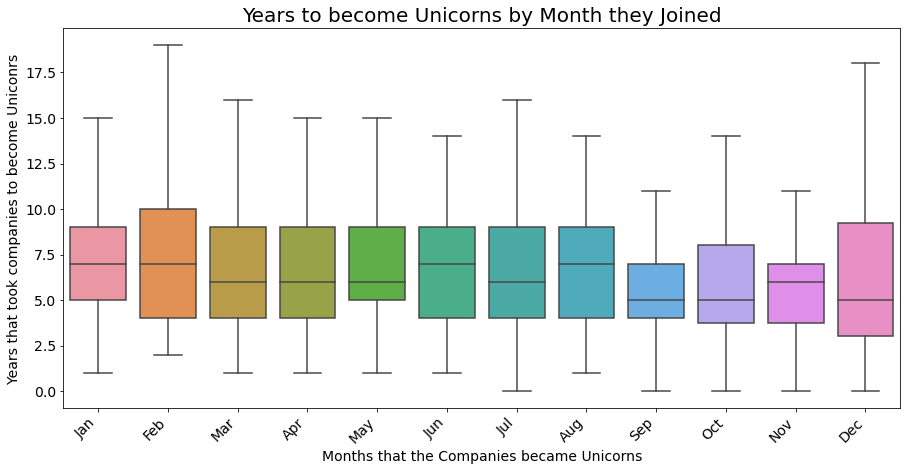

In [31]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.
plt.figure(figsize=(15,7))
sns.boxplot(companies['Month Joined'],companies['Years_to_Join'],
            order = months,
           showfliers = False)


# Set the title of the plot.
plt.title('Years to become Unicorns by Month they Joined',fontsize = 20)
plt.xlabel('Months that the Companies became Unicorns',fontsize=14)
plt.ylabel('Years that took companies to become Uniconrs',fontsize=14)

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45,horizontalalignment='right',fontsize=14)
plt.yticks(fontsize=14)

# Display the plot.
plt.show()




<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about creating a box plot](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Pf6KW/eda-structuring-with-python).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a box plot.

Use the functions in the `matplotlib.pyplot` module that allow you to acheive the following tasks:
- set the title of a plot
- rotate labels on the x-axis of a plot
- display a plot

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `boxplot()` function from `seaborn` to create a box plot, passing in the parameters `x`, `y`, `order`, and `showfliers`. To keep outliers from appearing on the box plot, set `showfliers` to `False`.

Use following functions to achieve the following tasks:
- `plt.title()` to set the title of a plot
- `plt.xticks()` to rotate labels on the x-axis of a plot
- pass in the parameters `rotation=45, horizontalalignment='right'`to rotate the labels by 45 degrees and align the labels to the right
- `plt.show()` to display a plot

</details>

**Question:** In the preceding box plot, what do you observe about the median value for `Years To Join` for each month?


> The meadian values each month is below 7.5 and above 5 indicating that the companies that joined the corresponding month has done by median less than 7.5 years and more than 5 years to become unicorn companies.

## Step 4: Results and evaluation


### Visualize the time it took companies to reach unicorn status

In this section, you will evaluate the result of structuring the data, making observations, and gaining further insights about the data. 

Using the `companies` dataset, create a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded. 

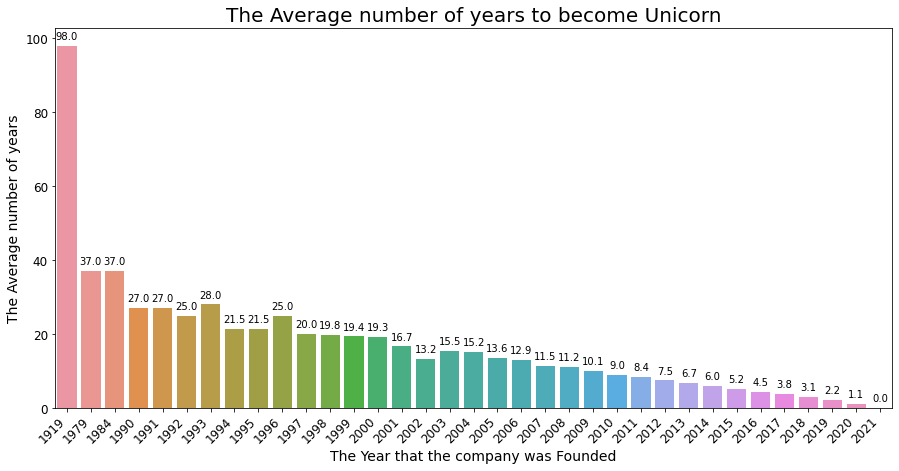

In [57]:
# Set the size of the plot.
plt.figure(figsize=(15,7))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.
p = sns.barplot(data=companies, x='Year Founded', y='Years_to_Join', estimator=np.mean, ci=False)

for b in p.patches:
    p.annotate(str(round(b.get_height(),1)),
              (b.get_x() + b.get_width() / 2, b.get_height() + 1.2),
              ha = 'center', va= 'bottom')

# Set title
plt.title('The Average number of years to become Unicorn',fontsize=20)

# Set x-axis label
plt.xlabel('The Year that the company was Founded',fontsize=14)

# Set y-axis label
plt.ylabel('The Average number of years',fontsize=14)

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12)
plt.yticks(fontsize=12)

# Display the plot.
plt.show()

In [54]:
companies.groupby('Year Founded').agg({'Years_to_Join':['sum','mean']}).round(2)

Years_to_Join       
                       sum   mean
Year Founded                     
1919                    98  98.00
1979                    37  37.00
1984                    37  37.00
1990                    27  27.00
1991                    27  27.00
1992                    25  25.00
1993                    28  28.00
1994                    43  21.50
1995                    43  21.50
1996                    25  25.00
1997                    20  20.00
1998                    99  19.80
1999                   155  19.38
2000                   212  19.27
2001                   150  16.67
2002                    53  13.25
2003                   124  15.50
2004                   122  15.25
2005                   190  13.57
2006                   194  12.93
2007                   276  11.50
2008                   303  11.22
2009                   345  10.15
2010                   358   8.95
2011                   685   8.35
2012                   709   7.46
2013                   584   6.71
2014                   656   6.02
2015                   806   5.20
2016                   491   4.46
2017                   282   3.81
2018                   190   3.11
2019                    98   2.18
2020                    27   1.08
2021                     0   0.00

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about creating a bar plot](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/0GjvK/date-string-manipulations-with-python).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a bar plot where the height of each bar is the average value for the corresponding category, by default.

Use the functions in the `matplotlib.pyplot` module that allow you to set the size, title, x-axis label, and y-axis label of plots. In that module, there are also functions for rotating the labels on the x-axis and displaying the plot. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `barplot()` function from `seaborn`, passing in the parameters `x`, `y`, and `ci`. To keep confidence interval lines from appearing on the bar plot,  set `ci` to `False`.

Use `plt.figure()`, passing in the `figsize` parameter to set the size of a plot.

Use `plt.title()`, `plt.xlabel()`, `plt.ylabel()` to set the title, x-axis label, and y-axis label, respectively. 

Use `plt.xticks()` to rotate labels on the x-axis of a plot. Paass in the parameters `rotation=45, horizontalalignment='right'` to rotate the labels by 45 degrees and align the labels to the right.

Use `plt.show()` to display a plot.

</details>

**Question:** What trends do you notice in the data? Specifically, consider companies that were founded later on. How long did it take those companies to reach unicorn status?


[Write your response here. Double-click (or enter) to edit.]

### Visualize the number of companies that joined per interval 

Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, create a bar plot to visualize the number of companies that joined per interval for that year. 

In [33]:
year_15_week.head()

,Week Joined,Company count
0,2015-W01,1
1,2015-W02,1
2,2015-W03,1
3,2015-W04,2
4,2015-W10,1


In [34]:
companies.index.values

array([   0,    1,    2, ..., 1071, 1072, 1073])

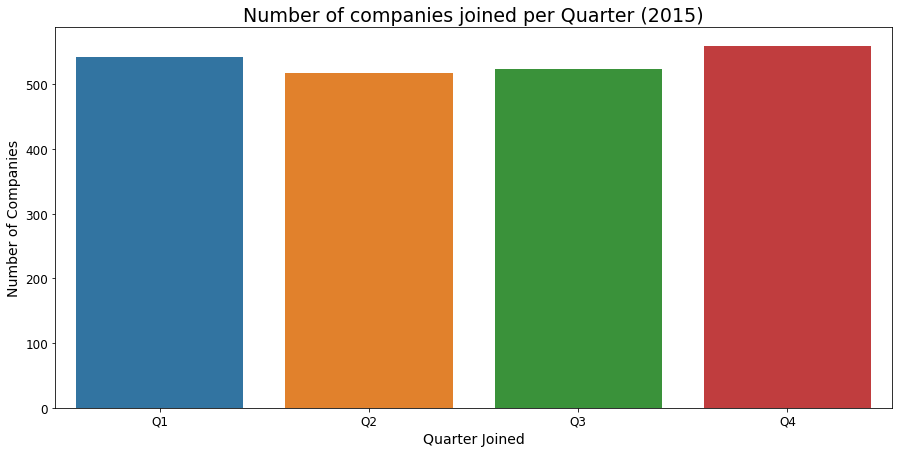

In [58]:
# Set the size of the plot.
plt.figure(figsize=(15,7))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.
sns.barplot(companies['Date Joined'].dt.to_period('Q').dt.strftime('Q%q'),
            companies.index,
            order = ['Q1','Q2','Q3','Q4'], ci=False)
    
# Set the x-axis label.
plt.xlabel('Quarter Joined',fontsize=14)

# Set the y-axis label.
plt.ylabel('Number of Companies',fontsize=14)

# Set the title.
plt.title('Number of companies joined per Quarter (2015)',fontsize=19)

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot.
plt.show()

In [36]:
year_15_week.head()

,Week Joined,Company count
0,2015-W01,1
1,2015-W02,1
2,2015-W03,1
3,2015-W04,2
4,2015-W10,1


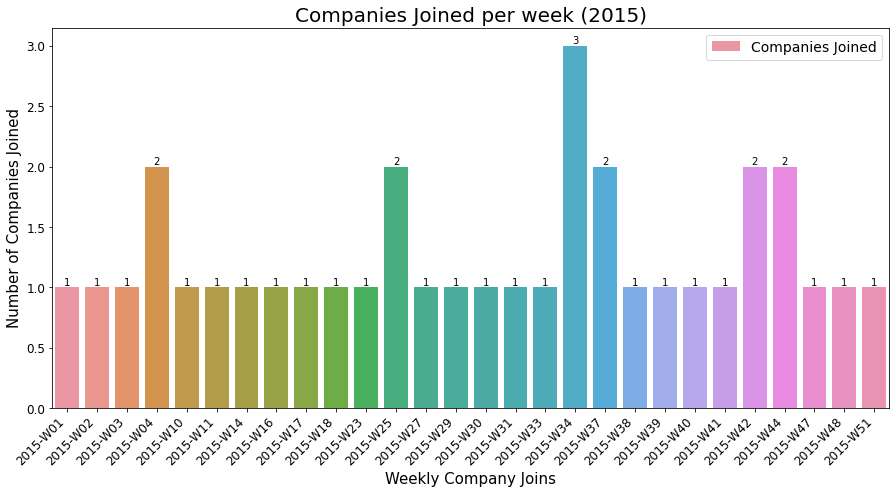

In [37]:
# Number of companies joined per the weekly interval of the 2015 sub dataset as created befor.

plt.figure(figsize=(15,7))
sns.barplot(data = year_15_week,
           x='Week Joined',
           y='Company count',
           label='Companies Joined')
for i in range(len(year_15_week['Week Joined'])):
    plt.text(i,year_15_week['Company count'][i],year_15_week['Company count'][i], ha ='center',va='bottom',fontsize=10)
plt.title('Companies Joined per week (2015)',fontsize=20)
plt.xlabel('Weekly Company Joins',fontsize=15)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12)
plt.ylabel('Number of Companies Joined',fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

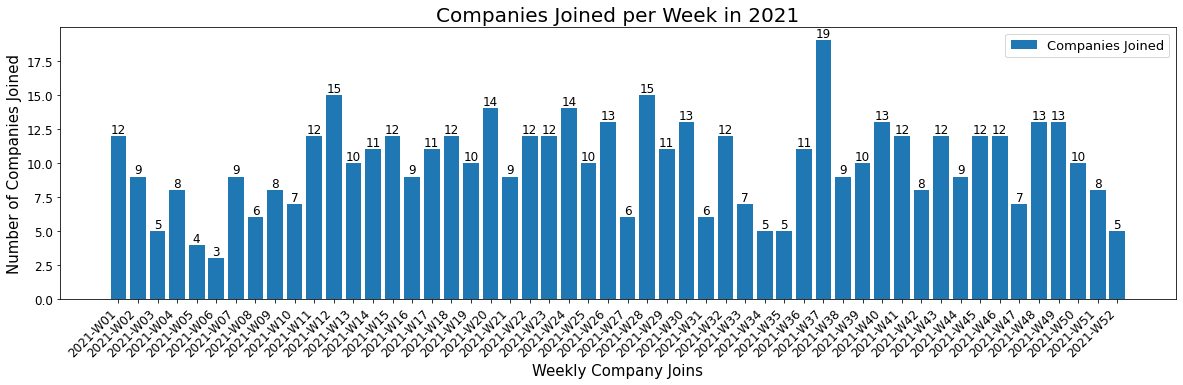

In [38]:
year_21 = companies.loc[companies['Year Joined'] == 2021]
#year_21['Week'] = year_21['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q') # if you want the per quarter view!
year_21['Week'] = year_21['Date Joined'].dt.strftime('%Y-W%V') # if you want the per week view!
year_21 = year_21.groupby('Week')['Company'].count().reset_index(name= 'Company Count')

def labels(x,y,s):
    for i in range(len(x)):
        plt.text(i,y[i],s[i],ha='center',va='bottom',fontsize=12)

plt.figure(figsize=(20,5))
plt.bar( x= year_21['Week'], height = year_21['Company Count'] , label = 'Companies Joined')
labels(year_21['Week'],year_21['Company Count'],year_21['Company Count'])
plt.title('Companies Joined per Week in 2021',fontsize=20)
plt.xlabel('Weekly Company Joins',fontsize=15)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12)
plt.ylabel('Number of Companies Joined',fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(fontsize=13)
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about creating a bar plot](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/0GjvK/date-string-manipulations-with-python).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a bar plot where the height of each bar is the average value for the corresponding category, by default.

Use the functions in the `matplotlib.pyplot` module that allow you to set the size, title, x-axis label, and y-axis label of plots. In that module, there are also functions for rotating the labels on the x-axis and displaying the plot. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `barplot()` function from `seaborn`, passing in the parameters `x`, `y`, and `ci`. To keep confidence interval lines from appearing on the bar plot,  set `ci` to `False`.

Use `plt.figure()`, passing in the `figsize` parameter to set the size of a plot.

Use `plt.title()`, `plt.xlabel()`, `plt.ylabel()` to set the title, x-axis label, and y-axis label, respectively. 

Use `plt.xticks()` to rotate labels on the x-axis of a plot. Paass in the parameters `rotation=45, horizontalalignment='right'` to rotate the labels by 45 degrees and align the labels to the right.

Use `plt.show()` to display a plot.

</details>

**Question:** What do you observe from the bar plot of the number of companies that joined per interval for the year of 2021? When did the highest number of companies reach $1 billion valuation?

  

> From the last graph tha is related with the year 2021, we can clearly see that the week 37 was the week with the most joined companies reching the 19 companies that became unicorns.

### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

In [39]:
df_concat.head()

,Year Joined,Quarter Joined,Average Valuation
0,2014,2014-Q1,48.00
1,2014,2014-Q2,2.50
2,2014,2014-Q3,3.33
3,2014,2014-Q4,9.17
4,2015,2015-Q1,3.00


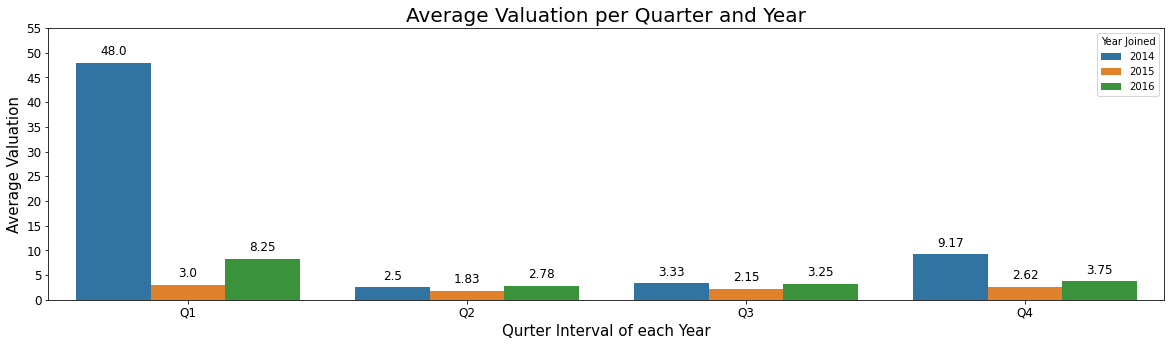

In [51]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset. 
df_concat['Quarter Joined'] = df_concat['Quarter Joined'].str.slice(5)

# Set the size of the plot.
plt.figure(figsize=(20,5))

# Create a grouped bar plot.
p = sns.barplot(data = df_concat, x = 'Quarter Joined' , y = 'Average Valuation', hue = 'Year Joined')

for b in p.patches:
    p.annotate(str(round(b.get_height(),2)),
              (b.get_x() + b.get_width() / 2, b.get_height()  + 2),
              ha='center', va='bottom',
              xytext = (0,-5),
              textcoords= ' offset points',
              fontsize=12)

# Set the x-axis label.
plt.xlabel('Qurter Interval of each Year',fontsize=15)
plt.xticks(fontsize=12)

# Set the y-axis label.
plt.ylabel('Average Valuation',fontsize=15)
plt.yticks(np.arange(0,60,5),fontsize=12)

# Set the title.
plt.title('Average Valuation per Quarter and Year',fontsize=20)

# Display the plot.
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about creating a grouped bar plot](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/Pf6KW/eda-structuring-with-python).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a grouped bar plot, specifying the category and height for each bar, as well as the hue.

Use the functions in the `matplotlib.pyplot` module that allow you to set the size, title, x-axis label, and y-axis label of plots. In that module, there is also a function for displaying the plot. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `plt.bar()` to create the bar plot, passing in the parameters `x`, `y`, and `hue`. For the task at hand, set `hue` to the column that contains year joined. 

Use `plt.figure()`, passing in the `figsize` parameter to set the size of a plot.

Use `plt.title()`, `plt.xlabel()`, `plt.ylabel()` to set the title, x-axis label, and y-axis label, respectively. 

Use `plt.show()` to display a plot.

</details>

**Question:** What do you observe from the preceding grouped bar plot?

  

> In the bar plot, I have illustrated the 3 years of my interest split per quarter. Reviewing my graph, I can clearly see that Q1 of 2014 was the quarter and year with the highest evaluations of the Joined Companies. In addition, the companies that joined the unicorn status in Q1 of every illustrated year seem to have the highest valuations compared to the other quarters of the corresponding year. The exact opposite, we can see occurred for Q2.

**Question:** Is there any bias in the data that could potentially inform your analysis?


[Write your response here. Double-click (or enter) to edit.]

**Question:** What potential next steps could you take with your EDA?

[Write your response here. Double-click (or enter) to edit.]

**Question:** Are there any unanswered questions you have about the data? If yes, what are they?


[Write your response here. Double-click (or enter) to edit.]

## Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What recommendations would you share with stakeholders based on these findings?**

[Write your response here. Double-click (or enter) to edit.]

**References**

Bhat, M.A. (2022, March).[*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 

